### Train Data Set

In [1]:
import pickle

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# from tensorflow.keras.datasets import mnist
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D,Conv3D, MaxPool2D,MaxPooling2D

from keras.losses import SparseCategoricalCrossentropy,categorical_crossentropy

from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
from keras.utils import to_categorical

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [3]:
X = pickle.load(open("DataSet/10K_Hand_X.pickle","rb"))
y = pickle.load(open("DataSet/10k_Hand_y.pickle","rb"))

In [4]:
X = X/255.0
y = np.array(y)
y_bin = to_categorical(y)

#### `Model 2`  accuracy = 98 

In [5]:
model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y_bin, validation_split = 0.2, epochs=1, batch_size=40, verbose=1)




Train on 168307 samples, validate on 42077 samples
Epoch 1/1
168307/168307 [==============================] - 2512s 15ms/step - loss: 0.1482 - accuracy: 0.9577 - val_loss: 0.0865 - val_accuracy: 0.9750


#### Predict

In [ ]:
test.shape

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

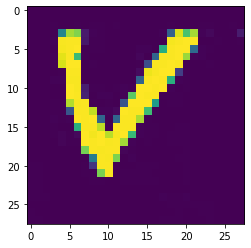

In [5]:
img_path = "Testimage/V1.jpg"
IMG_SIZE = 28

img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
image_neg = cv2.bitwise_not(new_array)

test = np.array(image_neg)
# test =np.array(data.iloc[259325:259326,1::]).reshape(28,28)
# test =np.array(data.iloc[337052:337053,1::]).reshape(28,28)
# test =np.array(data.iloc[151:152,1::]).reshape(28,28)
# test = cv2.resize(chars[0][-1],(28,28))
plt.imshow(test)

model.predict_proba(test.reshape(-1,28,28,1))

#### Save model

In [10]:
model.save('Models/10k_alldigits_e1_a98')
model.save_weights("Models/10k_alldigits_e1_a98.h5")